<a href="https://colab.research.google.com/github/celikmustafa89/tensorflow_breast_cancer_classification/blob/master/TensorFlow2_0_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ÖĞRETMEYİ ÖĞREN, ÖĞRENMEYİ ÖĞRET !!!
#
# Mustafa Çelik
# celikmustafa89@gmail.com
#
# Medium: https://medium.com/@celikmustafa89
# Github: https://github.com/celikmustafa89
# stackoverflow: https://stackoverflow.com/users/1523874/celik?tab=profile
# twitter: https://twitter.com/muselium

In [2]:
# tensorflow kütüphanesi import edilir
import tensorflow as tf 
# import edilen kütüphanenin hangi versiyon olduğuna bakılır
print(tf.__version__)

2.2.0-rc3


In [0]:
# göğüs kanser'i verilerinin bulunduğu 'scient-kit learn' kütüphanesi import edilir
from sklearn.datasets import load_breast_cancer

# import edilen veriseti(dataset) yüklenir
dataset = load_breast_cancer()

# Exploring Dataset (Veri Seti  Detayları)
1. bu veriseti'nin tipi nedir?   
2. içerisinde kaç tane veri(sample) var?  
3. kaç feature var?  
4. bu feature'ların isimleri neler?  
5. kaç target field yani sınıf var?

In [4]:
# 1. veri setinin tipine 'type' fonksiyonu ile bakılır
type(dataset)

sklearn.utils.Bunch

In [5]:
# veritipi dictionary sınıfı extend ettigi için dictionary sınıfının fonksiyonlarını kullanabiliriz.
# keys metodu ilgil dictionary'nin içerdiği verileri gösterir.
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
type(dataset.DESCR)
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
# data kısmı içerisinde bir array bulunduruyor
dataset.data
# data kısmının daha anlasılır olması açısından array boyutlarına bakabiliriz
dataset.data.shape
# 569 sample(veri) ve 30 feature sahip bir dataset

(569, 30)

In [9]:
# target alanının içerigine bakılır
dataset.target
# target alanı array oldugu için boyutuna bakabiliriz.
# dataset.target.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# malignant = kötü huylu
# benign    = iyi huylu
dataset.target_names


array(['malignant', 'benign'], dtype='<U9')

In [11]:
# feature isimlerinin bulunduğu veriler
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# ilgili verisetinin ismi 
dataset.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

1. Buraya kadar tensorflow kutuphanesini ekledik.
2. sklearn.datasets kütüphanesi altında göğüs-kanseri(breast-cancer) verisetini yükledik.
3. Breast cancer verisetini tanımaya çalıştık

# Preprocessing (Ön İşleme)


In [0]:
# verisetini train ve test setine ayırmak için kullandığımız kütüphane eklenir
from sklearn.model_selection import train_test_split

In [0]:
# veriseti test ve train olmak üzere 2 parçaya ayrılır
X_train, X_test, y_train, y_test = train_test_split(dataset.data,dataset.target,test_size=0.33)

In [16]:
N, D = X_test.shape
print('N = %d\nD = %d' % (N,D))

N = 188
D = 30


In [17]:
N, D = X_train.shape
print('N = %d\nD = %d' % (N,D))

N = 381
D = 30


In [20]:
# before
X_train[0][0]

9.876

In [0]:
# standardization için gerekli kütüphane eklenir
from sklearn.preprocessing import StandardScaler

# standardization fonksiyonu tanımlanır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
# after
X_train[0][0]

-1.18659970608003

# TensorFlow  Train ve Test (TensorFlow ile Train ve Test)

In [23]:
# model'in iskeleti olusturulur
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# burada model compile edilirken hangi algoritmalar ve metricler kullanılacak onlar belirlenir.
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# modeli train edilir
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100
              )

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 1.0794 - accuracy: 0.3386 - val_loss: 1.0282 - val_accuracy: 0.3191
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9850 - accuracy: 0.4173 - val_loss: 0.9420 - val_accuracy: 0.3777
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8953 - accuracy: 0.4672 - val_loss: 0.8646 - val_accuracy: 0.4468
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8184 - accuracy: 0.5171 - val_loss: 0.7962 - val_accuracy: 0.5372
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7513 - accuracy: 0.5853 - val_loss: 0.7357 - val_accuracy: 0.5585
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.6247 - val_loss: 0.6830 - val_accuracy: 0.6223
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6798 - val_loss: 0.6361 - val_accuracy: 0.6809
Epoch 8/100


In [24]:
print("Train Score: %s" % model.evaluate(X_train,y_train))
print("Test Score: %s" % model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9738
Train Score: [0.1056114062666893, 0.9737532734870911]
6/6 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9415
Test Score: [0.13276921212673187, 0.9414893388748169]


# Visualization (Sonuçların Görselleştirilmesi)

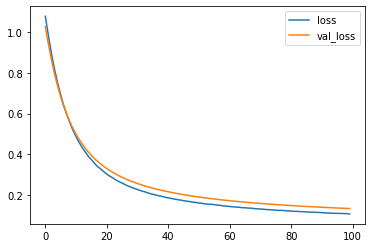

In [27]:
# görselleştirme için gereken matplotlib kütüphanesi eklenir
import matplotlib.pyplot as plt

r.history.keys()

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

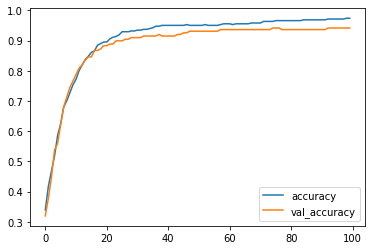

In [28]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Prediction

In [29]:
# test verisi ile prediction yapılır.
# sonuçlar 0-1 arasında değerler seklindedir
results = model.predict(X_test)
print(results)

[[9.51817751e-01]
 [9.57388043e-01]
 [3.08835506e-03]
 [9.86418366e-01]
 [4.78651315e-01]
 [8.92476559e-01]
 [7.22930670e-01]
 [6.86342299e-01]
 [5.72345734e-01]
 [9.96928930e-01]
 [6.53494717e-05]
 [9.33913112e-01]
 [8.22767973e-01]
 [2.16439294e-05]
 [8.44602704e-01]
 [9.57373261e-01]
 [9.95644033e-01]
 [7.46667385e-04]
 [4.39257026e-02]
 [9.63655233e-01]
 [1.64540559e-01]
 [9.97514248e-01]
 [9.81772602e-01]
 [1.21351361e-01]
 [8.37654889e-01]
 [3.00696790e-01]
 [9.79213357e-01]
 [4.88540620e-01]
 [9.43813205e-01]
 [8.85786414e-01]
 [9.93409872e-01]
 [9.86275971e-01]
 [9.93939161e-01]
 [9.95325327e-01]
 [9.23209190e-01]
 [7.69757926e-02]
 [1.23214722e-03]
 [9.49057698e-01]
 [9.82935131e-01]
 [9.83136892e-01]
 [1.16488802e-04]
 [9.76436019e-01]
 [9.85359073e-01]
 [9.71537352e-01]
 [8.91270638e-01]
 [9.54485536e-01]
 [9.86832142e-01]
 [8.48965943e-01]
 [8.94422233e-01]
 [3.10540199e-03]
 [9.21820521e-01]
 [1.12175256e-01]
 [9.74897265e-01]
 [9.21373188e-01]
 [9.56594288e-01]
 [7.199639

In [30]:
# modelimiz 1 ve 0 olmak üzere iki sınıftan olustugu için sonuc 1 veya 0 sekline getirilir
import numpy as np
results = np.round(results).flatten()
print(results)

[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]


In [31]:
# result degiskeni içerisinde modelimizin bulduğu sonuçlar bulunur
# y_test degiskeni içerisinde de olması gereken sonuçlar bulunur.
print(y_test)

[1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 1]


In [32]:
# simdi modelin buldugu ve gerçek sonuçlar arasında bir kıyaslama yapılır. yani accuracy hesabı yapılır.
print("Modelin başarısı(accuracy): ", np.mean(results == y_test))

Modelin başarısı(accuracy):  0.9414893617021277


In [33]:
# yukardaki accuracy hesabı sonucunun aynısını model nesnesi kullanılarakta yapılabilir
print("Modelin başarısı(accuracy): ",model.evaluate(X_test,y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9415
Modelin başarısı(accuracy):  [0.13276921212673187, 0.9414893388748169]
